# Movies Recommendation System

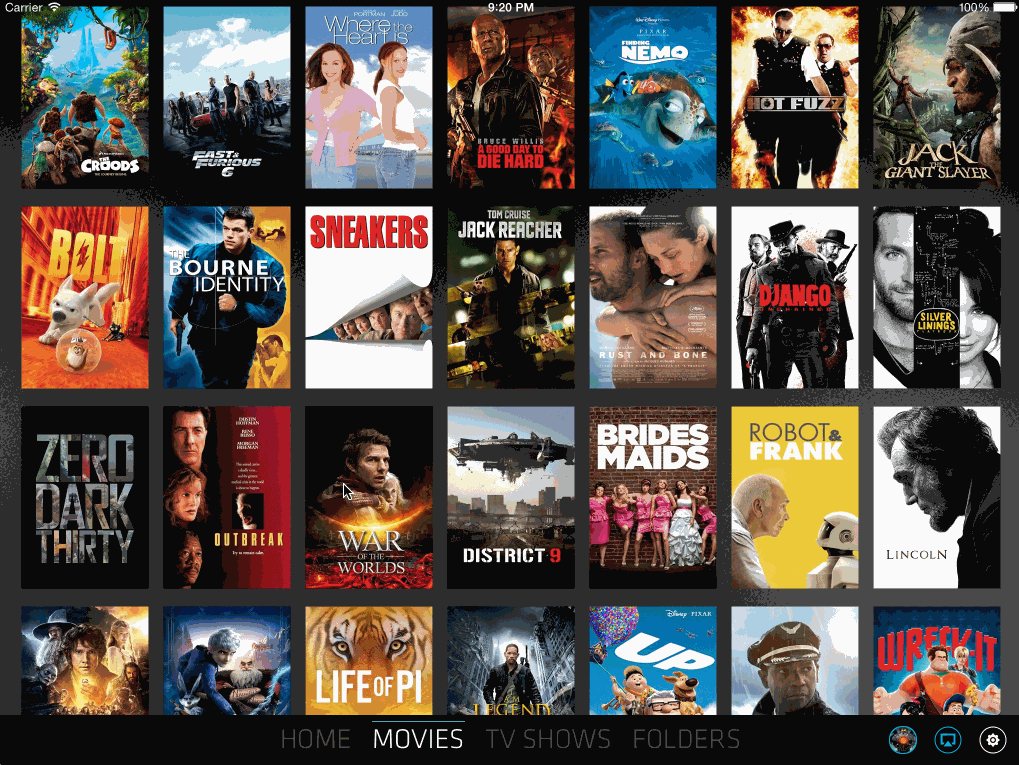

___
**Structure of the Project:**
1. Import our dependencies
2. Load dataset
3. Understand dataset
4. Data Wrangling-->(Already done)
5. Pre-processing steps-->(when needed)
6. Building a recommendation system
   - **6.1 Simple recommendation system**
   - **6.2 Content based recommendation system**
      - 6.2.1 Movie Description based Recommender
      - 6.2.2 Metadata based Recommender
   - **6.3 Collaborative-Filtering based recommendation system**
   - **6.4 Hybrid recommendation system**
   
We **Implement these models** & **Evaluate Results** of all above recommendation systems.

## 1.Importing Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

import warnings; warnings.simplefilter('ignore')

## 2.Load the Dataset

In this project we will implement a few recommendation algorithms like content based, popularity based and collaborative filtering and then try to build an ensemble engine of these models inorder to create a final recommendation system.\
For this purpose, We have used two MovieLens datasets as below:\
**1.The Full Dataset:** Consists of 26,000,000 ratings and 750,000 tag applications applied to 45,000 movies by 270,000 users.  Includes tag genome data with 12 million relevance scores across 1,100 tags.\
**2.The Small Dataset:** Comprises of 100,000 ratings and 1,300 tag applications applied to 9,000 movies by 700 users.

Note that we will be building a Simple Recommender using the Full Dataset and whereas all the personalised recommender systems will make use of the small dataset (due to the limited computing power).

In [2]:
md = pd. read_csv(r'C:\Users\Admin\Documents\Learning Programming\Movies Recommender system\Dataset\movies_metadata.csv') 

In [3]:
links_small = pd.read_csv(r'C:\Users\Admin\Documents\Learning Programming\Movies Recommender system\Dataset\links_small.csv')

In [4]:
credits = pd.read_csv(r'C:\Users\Admin\Documents\Learning Programming\Movies Recommender system\Dataset\credits.csv')

In [5]:
keywords = pd.read_csv(r'C:\Users\Admin\Documents\Learning Programming\Movies Recommender system\Dataset\keywords.csv')

In [6]:
ratings = pd.read_csv(r'C:\Users\Admin\Documents\Learning Programming\Movies Recommender system\Dataset\ratings_small.csv')

## 3.Understanding the Dataset

### MetaData Dataframe

In [7]:
md.head()

adult                              belongs_to_collection    budget  \
0  FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  FALSE                                                NaN  65000000   
2  FALSE  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  FALSE                                                NaN  16000000   
4  FALSE  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   10/30/1995   
1  When siblings Judy and Peter discover an encha...  ...   12/15/1995   
2  A family wedding reignites the ancient feud be...  ...   12/22/1995   
3  Cheated on, mistreated and stepped on, the wom...  ...   12/22/1995   
4  Just when George Banks has recovered from his ...  ...    2/10/1995   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [8]:
md.iloc[0:3].transpose()

0  \
adult                                                              FALSE   
belongs_to_collection  {'id': 10194, 'name': 'Toy Story Collection', ...   
budget                                                          30000000   
genres                 [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
homepage                            http://toystory.disney.com/toy-story   
id                                                                   862   
imdb_id                                                        tt0114709   
original_language                                                     en   
original_title                                                 Toy Story   
overview               Led by Woody, Andy's toys live happily in his ...   
popularity                                                       21.9469   
poster_path                             /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
production_companies      [{'name': 'Pixar Animation Studios', 'id': 3}]   
production_countries   [{'iso_3166_1': 'US', 'name': 'United States o...   
release_date                                                  10/30/1995   
revenue                                                      3.73554e+08   
runtime                                                               81   
spoken_languages                [{'iso_639_1': 'en', 'name': 'English'}]   
status                                                          Released   
tagline                                                              NaN   
title                                                          Toy Story   
video                                                              False   
vote_average                                                         7.7   
vote_count                                                          5415   

                                                                       1  \
adult                                                              FALSE   
belongs_to_collection                                                NaN   
budget                                                          65000000   
genres                 [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
homepage                                                             NaN   
id                                                                  8844   
imdb_id                                                        tt0113497   
original_language                                                     en   
original_title                                                   Jumanji   
overview               When siblings Judy and Peter discover an encha...   
popularity                                                       17.0155   
poster_path                             /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
production_companies   [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
production_countries   [{'iso_3166_1': 'US', 'name': 'United States o...   
release_date                                                  12/15/1995   
revenue                                                      2.62797e+08   
runtime                                                              104   
spoken_languages       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
status                                                          Released   
tagline                        Roll the dice and unleash the excitement!   
title                                                            Jumanji   
video                                                              False   
vote_average                                                         6.9   
vote_count                                                          2413   

                                                                       2  
adult                                                              FALSE  
belongs_to_collection  {'id': 119050, 'name': 'Grumpy Old Men Collect...  
budget                                      

In [9]:
md.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Features in our Metadata:**
* **adult:** Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the movie.
* **id:** The ID of the movie.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **poster_path:** The URL of the poster image.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc).
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **video:** Indicates if there is a video present of the movie with TMDB.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

In [10]:
md.shape

(45466, 24)

In [11]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

### Link Dataframe

In [12]:
links_small.head()

movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0

In [13]:
links_small.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

* **movieId:** It's serial number for movie
* **imdbId:** Movie id given on IMDb platform
* **tmdbId:** Movie id given on TMDb platform

In [14]:
links_small.shape

(9125, 3)

In [15]:
links_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


### Credits Dataframe

In [16]:
credits.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [17]:
credits.iloc[0:3]
credits['cast'].iloc[0:3]
credits.iloc[:,0:2]

cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
45471  [{'cast_id': 0, 'character': '', 'credit_id': ...   
45472  [{'cast_id': 1002, 'character': 'Sister Angela...   
45473  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   
45474  [{'cast_id': 2, 'character': '', 'credit_id': ...   
45475                                                 []   

                                                    crew  
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...  
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...  
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...  
3      [{'credit_id': '52fe44779251416c91011acb', 'de...  
4      [{'credit_id': '52fe44959251416c75039ed7', 'de...  
...                                                  ...  
45471  [{'credit_id': '5894a97d925141426c00818c', 'de...  
45472  [{'credit_id': '52fe4af1c3a36847f81e9b15', 'de...  
45473  [{'credit_id': '52fe4776c3a368484e0c8387', 'de...  
45474  [{'credit_id': '533bccebc3a36844cf0011a7', 'de...  
45475  [{'credit_id': '593e676c92514105b702e68e', 'de...  

[45476 rows x 2 columns]

In [18]:
credits.columns

Index(['cast', 'crew', 'id'], dtype='object')

* **cast:** Information about casting. Name of actor, gender and it's character name in movie
* **crew:** Information about crew members. Like who directed the movie, editor of the movie and so on.
* **id:** It's movie ID given by TMDb

In [19]:
credits.shape

(45476, 3)

In [20]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


### Keywords Dataframe

In [21]:
keywords.head()

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

In [22]:
keywords.columns

Index(['id', 'keywords'], dtype='object')

* **id:** It's movie ID given by TMDb
* **Keywords:** Tags/keywords for the movie. It list of tags/keywords

In [23]:
keywords.shape

(46419, 2)

In [24]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


### Ratings Dataframe

In [25]:
ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [26]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

* **userId:** It is id for User
* **movieId:** It is TMDb movie id.
* **rating:** Rating given for the particular movie by specific user
* **timestamp:** Time stamp when rating has been given by user

In [27]:
ratings.shape

(100004, 4)

In [28]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


## 4. Data Wrangling

* The Movie database [TMDb](https://www.themoviedb.org/movie/269149-zootopia?language=en)
* Already converted data from json to csv format

## 5. Pre-processing

* We will perform pre-processing as and when needed throughout the implementation of all recommenders mentioned above.

## 6. Building a Recommendation system

### 6.1. Simple Recommender System

**Approach:**

* The Simple Recommender system offers **generalized recommendations based on movie popularity & (sometimes) genre** to every user.

* The **basic idea** behind this recommender is that **movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience**.

* This model **does not give personalized recommendations** based on the user's taste & choices.

__What we are actually doing:__

- The implementation of this model is extremely trivial.
- All we have to do is **sort our movies based on ratings and popularity** and display the top movies of our list.
- As an added step, we can **pass in a genre argument to get the top movies of a particular genre**.
___
We will build our **overall Top 250 Chart** and define a function to build charts for a particular genre. Let's start!!!

In [29]:
md['genres'] = md['genres'].fillna('[]')    # Pre-processing

In [30]:
md.head(100)

adult                              belongs_to_collection    budget  \
0   FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1   FALSE                                                NaN  65000000   
2   FALSE  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3   FALSE                                                NaN  16000000   
4   FALSE  {'id': 96871, 'name': 'Father of the Bride Col...         0   
..    ...                                                ...       ...   
95  FALSE                                                NaN   3000000   
96  FALSE                                                NaN         0   
97  FALSE                                                NaN         0   
98  FALSE                                                NaN         0   
99  FALSE                                                NaN   7000000   

                                               genres  \
0   [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1   [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2   [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3   [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                      [{'id': 35, 'name': 'Comedy'}]   
..                                                ...   
95                      [{'id': 18, 'name': 'Drama'}]   
96  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
97                [{'id': 99, 'name': 'Documentary'}]   
98  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
99  [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...   

                                          homepage     id    imdb_id  \
0             http://toystory.disney.com/toy-story    862  tt0114709   
1                                              NaN   8844  tt0113497   
2                                              NaN  15602  tt0113228   
3                                              NaN  31357  tt0114885   
4                                              NaN  11862  tt0113041   
..                                             ...    ...        ...   
95                                             NaN    406  tt0113247   
96                                             NaN  45549  tt0111173   
97  http://www.nickbroomfield.com/heidifleiss.html  63076  tt0113283   
98                                             NaN  11062  tt0115907   
99                                             NaN  13685  tt0115734   

   original_language                 original_title  \
0                 en                      Toy Story   
1                 en                        Jumanji   
2                 en               Grumpier Old Men   
3                 en              Waiting to Exhale   
4                 en    Father of the Bride Part II   
..               ...                            ...   
95                fr                       La Haine   
96                en                       Shopping   
97                en  Heidi Fleiss: Hollywood Madam   
98                en                      City Hall   
99                en                  Bottle Rocket   

                                             overview  ... release_date  \
0   Led by Woody, Andy's toys live happily in his ...  ...   10/30/1995   
1   When siblings Judy and Peter discover an encha...  ...   12/15/1995   
2   A family wedding reignites the ancient feud be...  ...   12/22/1995   
3   Cheated on, mistreated and stepped on, the wom...  ...   12/22/1995   
4   Just when George Banks has recovered from his ...  ...    2/10/1995   
..                                                ...  ...          ...   
95  Aimlessly whiling away their days in the concr...  ...    5/31/1995   
96  A dark, hip, urban story of a barren and anony...  ...    12/6/1994   
97  A documentary crew from the BBC arrives in L.A...  ...   12/27/1995   
98  The accidental shooting of a boy in New York l...  ...    2/16/1996   
99  Upon his release from a mental hospital follow...  ...    2/21/1996   

   

In [31]:
md['genres'] = md['genres'].apply(literal_eval)    #Eval the Data 

In [32]:
md.head()

adult                              belongs_to_collection    budget  \
0  FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  FALSE                                                NaN  65000000   
2  FALSE  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  FALSE                                                NaN  16000000   
4  FALSE  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   10/30/1995   
1  When siblings Judy and Peter discover an encha...  ...   12/15/1995   
2  A family wedding reignites the ancient feud be...  ...   12/22/1995   
3  Cheated on, mistreated and stepped on, the wom...  ...   12/22/1995   
4  Just when George Banks has recovered from his ...  ...    2/10/1995   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [33]:
md['genres'] = md['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])   #Genres as List

In [34]:
md.head()

adult                              belongs_to_collection    budget  \
0  FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  FALSE                                                NaN  65000000   
2  FALSE  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  FALSE                                                NaN  16000000   
4  FALSE  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                         genres                              homepage     id  \
0   [Animation, Comedy, Family]  http://toystory.disney.com/toy-story    862   
1  [Adventure, Fantasy, Family]                                   NaN   8844   
2             [Romance, Comedy]                                   NaN  15602   
3      [Comedy, Drama, Romance]                                   NaN  31357   
4                      [Comedy]                                   NaN  11862   

     imdb_id original_language               original_title  \
0  tt0114709                en                    Toy Story   
1  tt0113497                en                      Jumanji   
2  tt0113228                en             Grumpier Old Men   
3  tt0114885                en            Waiting to Exhale   
4  tt0113041                en  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   10/30/1995   
1  When siblings Judy and Peter discover an encha...  ...   12/15/1995   
2  A family wedding reignites the ancient feud be...  ...   12/22/1995   
3  Cheated on, mistreated and stepped on, the wom...  ...   12/22/1995   
4  Just when George Banks has recovered from his ...  ...    2/10/1995   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [35]:
md[md['vote_count'].notnull()]  

adult                              belongs_to_collection    budget  \
0      FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      FALSE                                                NaN  65000000   
2      FALSE  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      FALSE                                                NaN  16000000   
4      FALSE  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  FALSE                                                NaN         0   
45462  FALSE                                                NaN         0   
45463  FALSE                                                NaN         0   
45464  FALSE                                                NaN         0   
45465  FALSE                                                NaN         0   

                             genres                              homepage  \
0       [Animation, Comedy, Family]  http://toystory.disney.com/toy-story   
1      [Adventure, Fantasy, Family]                                   NaN   
2                 [Romance, Comedy]                                   NaN   
3          [Comedy, Drama, Romance]                                   NaN   
4                          [Comedy]                                   NaN   
...                             ...                                   ...   
45461               [Drama, Family]  http://www.imdb.com/title/tt6209470/   
45462                       [Drama]                                   NaN   
45463     [Action, Drama, Thriller]                                   NaN   
45464                            []                                   NaN   
45465                            []                                   NaN   

           id    imdb_id original_language               original_title  \
0         862  tt0114709                en                    Toy Story   
1        8844  tt0113497                en                      Jumanji   
2       15602  tt0113228                en             Grumpier Old Men   
3       31357  tt0114885                en            Waiting to Exhale   
4       11862  tt0113041                en  Father of the Bride Part II   
...       ...        ...               ...                          ...   
45461  439050  tt6209470                fa                      رگ خواب   
45462  111109  tt2028550                tl          Siglo ng Pagluluwal   
45463   67758  tt0303758                en                     Betrayal   
45464  227506  tt0008536                en          Satana likuyushchiy   
45465  461257  tt6980792                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   10/30/1995   
1      When siblings Judy and Peter discover an encha...  ...   12/15/1995   
2      A family wedding reignites the ancient feud be...  ...   12/22/1995   
3      Cheated on, mistreated and stepped on, the wom...  ...   12/22/1995   
4      Just when George Banks has recovered from his ...  ...    2/10/1995   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   11/17/2011   
45463  When one of her hits goes wrong, a professiona...  ...     8/1/2003   
45464  In a small town live two brothers, one a minis...  ...   10/21/1917   
45465  50 years after decriminalisation of homosexual...  ...     6/9/2017   

           revenue runtime                                   spoken_languages  \
0      373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1      262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2              0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}

In [36]:
vote_count = md[md['vote_count'].notnull()]['vote_count'].astype('int')
vote_count

0        5415
1        2413
2          92
3          34
4         173
         ... 
45461       1
45462       3
45463       6
45464       0
45465       0
Name: vote_count, Length: 45460, dtype: int32

In [37]:
vote_average = md[md['vote_average'].notnull()]['vote_average'].astype('int')   
vote_average 

0        7
1        6
2        6
3        6
4        5
        ..
45461    4
45462    9
45463    3
45464    0
45465    0
Name: vote_average, Length: 45460, dtype: int32

In [38]:
top_movies=md.copy()

In [39]:
top_movies1 = top_movies.sort_values('vote_average' , ascending=False).head(250)

In [40]:
top_movies1   #No Minimum Votes Requirement

adult belongs_to_collection  budget  \
21642  FALSE                   NaN       0   
15710  FALSE                   NaN       0   
22396  FALSE                   NaN       0   
22395  FALSE                   NaN       0   
35343  FALSE                   NaN  300000   
...      ...                   ...     ...   
35428  FALSE                   NaN       0   
24882  FALSE                   NaN       0   
4183   FALSE                   NaN       0   
36345  FALSE                   NaN       0   
30212  FALSE                   NaN       0   

                                       genres  \
21642                           [Documentary]   
15710                           [Documentary]   
22396                           [Documentary]   
22395                           [Documentary]   
35343  [Comedy, Documentary, Music, TV Movie]   
...                                       ...   
35428                        [Drama, Romance]   
24882                                      []   
4183                        [Thriller, Drama]   
36345                        [History, Drama]   
30212                           [Documentary]   

                                  homepage      id    imdb_id  \
21642                                  NaN  320849  tt0886500   
15710                                  NaN   96451  tt1587373   
22396                                  NaN   72123  tt1341746   
22395  http://www.marvinhamlischmovie.com/  230864  tt3011874   
35343                                  NaN  140595  tt0308213   
...                                    ...     ...        ...   
35428        http://www.kuraitokorode.com/  206155  tt0872007   
24882                                  NaN  273334  tt3575800   
4183                                   NaN   88727  tt0157411   
36345                                  NaN  359154  tt4699592   
30212                                  NaN  300179  tt3402078   

      original_language                                    original_title  \
21642                en   Ice Age Columbus: Who Were the First Americans?   
15710                en         If God Is Willing and da Creek Don't Rise   
22396                en                                    Meat the Truth   
22395                en             Marvin Hamlisch: What He Did For Love   
35343                en                        Elaine Stritch: At Liberty   
...                 ...                                               ...   
35428                ja                                       暗いところで待ち合わせ   
24882                en  United States of Secrets (Part One): The Program   
4183                 no                                       1732 Høtten   
36345                ab                                13 dies de octubre   
30212                en                            The Lion’s Mouth Opens   

                                                overview  ... release_date  \
21642  Firmly rooted in the latest scientific discove...  ...     1/1/2005   
15710  In 2006, director Spike Lee created an astonis...  ...    8/23/2010   
22396  Meat the Truth is a high-profile documentary w...  ...    10/3/2008   
22395  When Marvin Hamlisch passed away in August 201...  ...   10/12/2013   
35343  Judy at the Palace. Sinatra at Carnegie Hall. ...  ...     1/1/2002   
...                                                  ...  ...          ...   
35428  Michiru has lost her eyesight, and to make mat...  ...     9/5/2006   
24882  Last year Edward Snowden downloaded tens of th...  ...    5/13/2014   
4183   A few months after a girl with developmental d...  ...   12/26/1998   
36345                                                NaN  ...    9/10/2015   
30212  A documentary on filmmaker Marianna Palka, as ...  ...    1/18/2014   

      revenue runtime                                   spoken_languages  \
21642     0.0     0.0                                                 []   
15710     0.0   255.0                                                 

In [41]:
top_movies2 = top_movies[top_movies['vote_count']>1000]  #Minimum Number of Votes 1000

In [42]:
top_movies2

adult                              belongs_to_collection     budget  \
0      FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...   30000000   
1      FALSE                                                NaN   65000000   
5      FALSE                                                NaN   60000000   
9      FALSE  {'id': 645, 'name': 'James Bond Collection', '...   58000000   
15     FALSE                                                NaN   52000000   
...      ...                                                ...        ...   
43644  FALSE                                                NaN   34000000   
44009  FALSE  {'id': 86066, 'name': 'Despicable Me Collectio...   80000000   
44274  FALSE  {'id': 173710, 'name': 'Planet of the Apes (Re...  152000000   
44678  FALSE                                                NaN  100000000   
44842  FALSE  {'id': 8650, 'name': 'Transformers Collection'...  260000000   

                                               genres  \
0                         [Animation, Comedy, Family]   
1                        [Adventure, Fantasy, Family]   
5                    [Action, Crime, Drama, Thriller]   
9                       [Adventure, Action, Thriller]   
15                                     [Drama, Crime]   
...                                               ...   
43644                                 [Action, Crime]   
44009  [Action, Animation, Adventure, Family, Comedy]   
44274                   [Drama, Science Fiction, War]   
44678         [Action, Drama, History, Thriller, War]   
44842  [Action, Science Fiction, Thriller, Adventure]   

                                                homepage      id    imdb_id  \
0                   http://toystory.disney.com/toy-story     862  tt0114709   
1                                                    NaN    8844  tt0113497   
5                                                    NaN     949  tt0113277   
9           http://www.mgm.com/view/movie/757/Goldeneye/     710  tt0113189   
15                                                   NaN     524  tt0112641   
...                                                  ...     ...        ...   
43644                                                NaN  339403  tt3890160   
44009                           http://www.despicable.me  324852  tt3469046   
44274  http://www.foxmovies.com/movies/war-for-the-pl...  281338  tt3450958   
44678                       http://www.dunkirkmovie.com/  374720  tt5013056   
44842                  http://www.transformersmovie.com/  335988  tt3371366   

      original_language                  original_title  \
0                    en                       Toy Story   
1                    en                         Jumanji   
5                    en                            Heat   
9                    en                       GoldenEye   
15                   en                          Casino   
...                 ...                             ...   
43644                en                     Baby Driver   
44009                en                 Despicable Me 3   
44274                en  War for the Planet of the Apes   
44678                en                         Dunkirk   
44842                en   Transformers: The Last Knight   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   10/30/1995   
1      When siblings Judy and Peter discover an encha...  ...   12/15/1995   
5      Obsessive master thief, Neil McCauley leads a ...  ...   12/15/1995   
9      James Bond must unmask the mysterious head of ...  ...   11/16/1995   
15     The life of the gambling paradise – Las Vegas ...  ...   11/22/1995   
...                                                  ...  ...          ...   
43644  After being coerced into working for a crime b...  ...    6/28/2017   
44009  Gru and his wife Lucy must stop former '80s ch...  ...    6/15/2017   
44274  Caesar and his ape

In [43]:
top_movies2.sort_values('vote_average' , ascending=False).head(250)

adult                              belongs_to_collection     budget  \
314    FALSE                                                NaN   25000000   
40251  FALSE                                                NaN          0   
834    FALSE  {'id': 230, 'name': 'The Godfather Collection'...    6000000   
1152   FALSE                                                NaN    3000000   
1176   FALSE  {'id': 119674, 'name': 'Psycho Collection', 'p...     806948   
...      ...                                                ...        ...   
11353  FALSE                                                NaN   76000000   
24241  FALSE                                                NaN   58800000   
13893  FALSE  {'id': 1241, 'name': 'Harry Potter Collection'...  250000000   
23561  FALSE                                                NaN   18000000   
12368  FALSE                                                NaN   15000000   

                                           genres  \
314                                [Drama, Crime]   
40251                 [Romance, Animation, Drama]   
834                                [Drama, Crime]   
1152                                      [Drama]   
1176                    [Drama, Horror, Thriller]   
...                                           ...   
11353  [Drama, Action, Thriller, Science Fiction]   
24241                               [War, Action]   
13893                [Adventure, Fantasy, Family]   
23561                             [Drama, Comedy]   
12368                      [Comedy, Drama, Crime]   

                                                homepage      id    imdb_id  \
314                                                  NaN     278  tt0111161   
40251    https://www.funimationfilms.com/movie/yourname/  372058  tt5311514   
834                         http://www.thegodfather.com/     238  tt0068646   
1152                                                 NaN     510  tt0073486   
1176                                                 NaN     539  tt0054215   
...                                                  ...     ...        ...   
11353  http://www.universalstudiosentertainment.com/c...    9693  tt0206634   
24241                 http://www.americansnipermovie.com  190859  tt2179136   
13893  http://harrypotter.warnerbros.com/harrypottera...     767  tt0417741   
23561                                                NaN  194662  tt2562232   
12368          http://www.filminfocus.com/film/in_bruges    8321  tt0780536   

      original_language                          original_title  \
314                  en                The Shawshank Redemption   
40251                ja                                   君の名は。   
834                  en                           The Godfather   
1152                 en         One Flew Over the Cuckoo's Nest   
1176                 en                                  Psycho   
...                 ...                                     ...   
11353                en                         Children of Men   
24241                en                         American Sniper   
13893                en  Harry Potter and the Half-Blood Prince   
23561                en                                 Birdman   
12368                en                               In Bruges   

                                                overview  ... release_date  \
314    Framed in the 1940s for the double murder of h...  ...    9/23/1994   
40251  High schoolers Mitsuha and Taki are complete s...  ...    8/26/2016   
834    Spanning the years 1945 to 1955, a chronicle o...  ...    3/14/1972   
1152   While serving time for insanity at a state men...  ...   11/18/1975   
1176   When larcenous real estate clerk Marion Crane ...  ...    6/16/1960   
...                                                  ...  ...          ...   
11353  In 2027, in a chaotic world in which humans ca...  ...    9/22/2006   
24241  U.S. Navy SEAL Chris Kyle takes his sole missi..

* I use the TMDB Ratings to come up with our Top Movies Chart.
* I will use IMDB's weighted rating formula to construct my chart.
* Mathematically, it is represented as follows:

$\large Weighted\; Rating (WR) = (\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$\
where,\
      R = average for the movie as number from 1 to 10 (mean) = (Rating)\
      v = number of votes for the movie = (votes)\
      m = minimum votes required to be listed in the Top 250 (currently 25,000)\
      C = the mean vote across the whole report (currently  7.0)

In [44]:
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('int') #this is v
vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('int') #this is R
C = vote_average.mean() #this is C
C

5.244896612406511

- The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. 
- We will use **95th percentile** as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.
- We will Calculate **C value as average vote across the dataset**.\
___
 Here we Build our overall Top 250 Chart and will define a function to build charts for a particular genre. Lets go

In [45]:
m = vote_counts.quantile(0.95)
m

434.0

In [46]:
# Pre-processing step for getting year from date by splliting it using '-'
top_movies['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [47]:
top_movies

adult                              belongs_to_collection    budget  \
0      FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      FALSE                                                NaN  65000000   
2      FALSE  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      FALSE                                                NaN  16000000   
4      FALSE  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  FALSE                                                NaN         0   
45462  FALSE                                                NaN         0   
45463  FALSE                                                NaN         0   
45464  FALSE                                                NaN         0   
45465  FALSE                                                NaN         0   

                             genres                              homepage  \
0       [Animation, Comedy, Family]  http://toystory.disney.com/toy-story   
1      [Adventure, Fantasy, Family]                                   NaN   
2                 [Romance, Comedy]                                   NaN   
3          [Comedy, Drama, Romance]                                   NaN   
4                          [Comedy]                                   NaN   
...                             ...                                   ...   
45461               [Drama, Family]  http://www.imdb.com/title/tt6209470/   
45462                       [Drama]                                   NaN   
45463     [Action, Drama, Thriller]                                   NaN   
45464                            []                                   NaN   
45465                            []                                   NaN   

           id    imdb_id original_language               original_title  \
0         862  tt0114709                en                    Toy Story   
1        8844  tt0113497                en                      Jumanji   
2       15602  tt0113228                en             Grumpier Old Men   
3       31357  tt0114885                en            Waiting to Exhale   
4       11862  tt0113041                en  Father of the Bride Part II   
...       ...        ...               ...                          ...   
45461  439050  tt6209470                fa                      رگ خواب   
45462  111109  tt2028550                tl          Siglo ng Pagluluwal   
45463   67758  tt0303758                en                     Betrayal   
45464  227506  tt0008536                en          Satana likuyushchiy   
45465  461257  tt6980792                en                     Queerama   

                                                overview  ...      revenue  \
0      Led by Woody, Andy's toys live happily in his ...  ...  373554033.0   
1      When siblings Judy and Peter discover an encha...  ...  262797249.0   
2      A family wedding reignites the ancient feud be...  ...          0.0   
3      Cheated on, mistreated and stepped on, the wom...  ...   81452156.0   
4      Just when George Banks has recovered from his ...  ...   76578911.0   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          0.0   
45462  An artist struggles to finish his work while a...  ...          0.0   
45463  When one of her hits goes wrong, a professiona...  ...          0.0   
45464  In a small town live two brothers, one a minis...  ...          0.0   
45465  50 years after decriminalisation of homosexual...  ...          0.0   

      runtime                                   spoken_languages    status  \
0        81.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1       104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2       101.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3      

In [48]:
top_movies3 = top_movies[(top_movies['vote_count'] >= m) & (top_movies['vote_count'].notnull()) & (top_movies['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
top_movies3['vote_count'] = top_movies3['vote_count'].astype('int')
top_movies3['vote_average'] = top_movies3['vote_average'].astype('int')
top_movies3.shape

(2274, 6)

- Therefore, to qualify to be considered for the chart, a movie has to have at least **434 votes** on TMDB.
- We also see that the **average rating** for a **movie on TMDB is 5.244 on a scale of 10**.
- Here, only **2274 movies** are qualify to be on our chart.

In [49]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [50]:
top_movies3['weight_rate'] = top_movies3.apply(weighted_rating, axis=1)

In [51]:
top_movies3.head()

title  year  vote_count  vote_average popularity  \
0   Toy Story  1995        5415             7    21.9469   
1     Jumanji  1995        2413             6    17.0155   
5        Heat  1995        1886             7    17.9249   
9   GoldenEye  1995        1194             6     14.686   
15     Casino  1995        1343             7    10.1374   

                              genres  weight_rate  
0        [Animation, Comedy, Family]     6.869770  
1       [Adventure, Fantasy, Family]     5.884891  
5   [Action, Crime, Drama, Thriller]     6.671675  
9      [Adventure, Action, Thriller]     5.798701  
15                    [Drama, Crime]     6.571348

In [52]:
top_movies3 = top_movies3.sort_values('weight_rate', ascending=False).head(10)

#### Top movies

In [53]:
top_movies3.head(10) 

title  year  vote_count  \
15480                                          Inception  2010       14075   
12481                                    The Dark Knight  2008       12269   
22879                                       Interstellar  2014       11187   
2843                                          Fight Club  1999        9678   
4863   The Lord of the Rings: The Fellowship of the Ring  2001        8892   
292                                         Pulp Fiction  1994        8670   
314                             The Shawshank Redemption  1994        8358   
7000       The Lord of the Rings: The Return of the King  2003        8226   
351                                         Forrest Gump  1994        8147   
5814               The Lord of the Rings: The Two Towers  2002        7641   

       vote_average popularity  \
15480             8    29.1081   
12481             8    123.167   
22879             8    32.2135   
2843              8    63.8696   
4863              8    32.0707   
292               8     140.95   
314               8    51.6454   
7000              8    29.3244   
351               8    48.3072   
5814              8    29.4235   

                                                  genres  weight_rate  
15480  [Action, Thriller, Science Fiction, Mystery, A...     7.917588  
12481                   [Drama, Action, Crime, Thriller]     7.905871  
22879                [Adventure, Drama, Science Fiction]     7.897107  
2843                                             [Drama]     7.881753  
4863                        [Adventure, Fantasy, Action]     7.871787  
292                                    [Thriller, Crime]     7.868660  
314                                       [Drama, Crime]     7.864000  
7000                        [Adventure, Fantasy, Action]     7.861927  
351                             [Comedy, Drama, Romance]     7.860656  
5814                        [Adventure, Fantasy, Action]     7.851924

- We see that three Christopher Nolan Films, **Inception, The Dark Knight** and **Interstella** occur at the very top of our chart.
- The chart also indicates a strong bias of TMDB Users towards particular genres and directors.
___
- Let us now construct our **function that builds charts for particular genres**.
- For this, we **relax our default conditions to the 85th percentile instead of 95.

In [54]:
'''
>>> s
     a   b
one  1.  2.
two  3.  4.

>>> s.stack()
one a    1
    b    2
two a    3
    b    4
'''
genre_TM = top_movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
genre_TM.name = 'genre'
genre_top_movies= top_movies.drop('genres', axis=1).join(genre_TM)

In [55]:
genre_top_movies.head().transpose()

0  \
adult                                                              FALSE   
belongs_to_collection  {'id': 10194, 'name': 'Toy Story Collection', ...   
budget                                                          30000000   
homepage                            http://toystory.disney.com/toy-story   
id                                                                   862   
imdb_id                                                        tt0114709   
original_language                                                     en   
original_title                                                 Toy Story   
overview               Led by Woody, Andy's toys live happily in his ...   
popularity                                                       21.9469   
poster_path                             /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
production_companies      [{'name': 'Pixar Animation Studios', 'id': 3}]   
production_countries   [{'iso_3166_1': 'US', 'name': 'United States o...   
release_date                                                  10/30/1995   
revenue                                                      3.73554e+08   
runtime                                                               81   
spoken_languages                [{'iso_639_1': 'en', 'name': 'English'}]   
status                                                          Released   
tagline                                                              NaN   
title                                                          Toy Story   
video                                                              False   
vote_average                                                         7.7   
vote_count                                                          5415   
year                                                                1995   
genre                                                          Animation   

                                                                       0  \
adult                                                              FALSE   
belongs_to_collection  {'id': 10194, 'name': 'Toy Story Collection', ...   
budget                                                          30000000   
homepage                            http://toystory.disney.com/toy-story   
id                                                                   862   
imdb_id                                                        tt0114709   
original_language                                                     en   
original_title                                                 Toy Story   
overview               Led by Woody, Andy's toys live happily in his ...   
popularity                                                       21.9469   
poster_path                             /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
production_companies      [{'name': 'Pixar Animation Studios', 'id': 3}]   
production_countries   [{'iso_3166_1': 'US', 'name': 'United States o...   
release_date                                                  10/30/1995   
revenue                                                      3.73554e+08   
runtime                                                               81   
spoken_languages                [{'iso_639_1': 'en', 'name': 'English'}]   
status                                                          Released   
tagline                                                              NaN   
title                                                          Toy Story   
video                                                              False   
vote_average                                                         7.7   
vote_count                                                          5415   
year                                                                1995   
genre                                                             Comedy   

                                                                       0  \
adult                                    

In [56]:
def build_chart(genre, percentile=0.85):
    df = genre_top_movies[genre_top_movies['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

Let us see our method in action by displaying the **Top 15 Romance Movies** (Romance almost didn't feature at all in our Generic Top Chart despite being one of the most popular movie genres).

**Top 15 Romantic Movies**

In [57]:
build_chart('Romance').head(15)

title  year  vote_count  vote_average popularity  \
10309  Dilwale Dulhania Le Jayenge  1995         661             9     34.457   
351                   Forrest Gump  1994        8147             8    48.3072   
876                        Vertigo  1958        1162             8    18.2082   
40251                   Your Name.  2016        1030             8  34.461252   
883               Some Like It Hot  1959         835             8    11.8451   
1132               Cinema Paradiso  1988         834             8     14.177   
19901                     Paperman  2012         734             8    7.19863   
37863                  Sing Street  2016         669             8  10.672862   
882                  The Apartment  1960         498             8    11.9943   
38718               The Handmaiden  2016         453             8  16.727405   
3189                   City Lights  1931         444             8    10.8915   
24886             The Way He Looks  2014         262             8    5.71127   
45437               In a Heartbeat  2017         146             8   20.82178   
1639                       Titanic  1997        7770             7    26.8891   
19731      Silver Linings Playbook  2012        4840             7    14.4881   

             wr  
10309  8.565285  
351    7.971357  
876    7.811667  
40251  7.789489  
883    7.745154  
1132   7.744878  
19901  7.713951  
37863  7.689483  
882    7.599317  
38718  7.566166  
3189   7.558867  
24886  7.331363  
45437  7.003959  
1639   6.981546  
19731  6.970581

Our method also works similarly for other genre by displaying the **Top 15 Animation, Family** and **Action Movies** as below:

In [58]:
build_chart('Animation').head(15)

title  year  vote_count  vote_average  \
359                      The Lion King  1994        5520             8   
5481                     Spirited Away  2001        3968             8   
9698              Howl's Moving Castle  2004        2049             8   
2884                 Princess Mononoke  1997        2041             8   
5833                My Neighbor Totoro  1988        1730             8   
40251                       Your Name.  2016        1030             8   
5553            Grave of the Fireflies  1988         974             8   
19901                         Paperman  2012         734             8   
39386                            Piper  2016         487             8   
20779                    Wolf Children  2012         483             8   
25044                  Song of the Sea  2014         420             8   
31658                            Feast  2014         420             8   
19101                           Presto  2008         371             8   
24209  The Tale of the Princess Kaguya  2013         350             8   
13724                               Up  2009        7048             7   

      popularity        wr  
359      21.6058  7.909339  
5481     41.0489  7.875933  
9698      16.136  7.772103  
2884     17.1667  7.771305  
5833     13.5073  7.735274  
40251  34.461252  7.589820  
5553    0.010902  7.570962  
19901    7.19863  7.465676  
39386  11.243161  7.285132  
20779    10.2495  7.281198  
25044    6.96736  7.212999  
31658    7.36566  7.212999  
19101    8.56386  7.150295  
24209    7.56605  7.120255  
13724    19.3309  6.961798

In [59]:
build_chart('Family').head(15)

title  year  vote_count  \
1225                         Back to the Future  1985        6239   
359                               The Lion King  1994        5520   
5481                              Spirited Away  2001        3968   
5833                         My Neighbor Totoro  1988        1730   
926                       It's a Wonderful Life  1946        1103   
19901                                  Paperman  2012         734   
39386                                     Piper  2016         487   
20779                             Wolf Children  2012         483   
31658                                     Feast  2014         420   
25044                           Song of the Sea  2014         420   
4766   Harry Potter and the Philosopher's Stone  2001        7188   
13724                                        Up  2009        7048   
30315                                Inside Out  2015        6737   
15472                             Despicable Me  2010        6595   
12704                                    WALL·E  2008        6439   

       vote_average popularity        wr  
1225              8    25.7785  7.893053  
359               8    21.6058  7.879754  
5481              8    41.0489  7.835635  
5833              8    13.5073  7.650968  
926               8    15.0316  7.490637  
19901             8    7.19863  7.301918  
39386             8  11.243161  7.071694  
20779             8    10.2495  7.066709  
31658             8    7.36566  6.980490  
25044             8    6.96736  6.980490  
4766              7    38.1872  6.941838  
13724             7    19.3309  6.940724  
30315             7    23.9856  6.938090  
15472             7    22.2745  6.936808  
12704             7    16.0884  6.935337

In [60]:
build_chart('Action').head(15)

title  year  vote_count  \
15480                                          Inception  2010       14075   
12481                                    The Dark Knight  2008       12269   
4863   The Lord of the Rings: The Fellowship of the Ring  2001        8892   
7000       The Lord of the Rings: The Return of the King  2003        8226   
5814               The Lord of the Rings: The Two Towers  2002        7641   
256                                            Star Wars  1977        6778   
1154                             The Empire Strikes Back  1980        5998   
4135                                            Scarface  1983        3017   
9430                                              Oldboy  2003        2000   
1910                                       Seven Samurai  1954         892   
43190                                   Band of Brothers  2001         725   
1215                                                   M  1931         465   
14551                                             Avatar  2009       12114   
17818                                       The Avengers  2012       12000   
26564                                           Deadpool  2016       11444   

       vote_average popularity        wr  
15480             8    29.1081  7.955099  
12481             8    123.167  7.948610  
4863              8    32.0707  7.929579  
7000              8    29.3244  7.924031  
5814              8    29.4235  7.918382  
256               8    42.1497  7.908327  
1154              8     19.471  7.896841  
4135              8    11.2997  7.802046  
9430              8    10.6169  7.711649  
1910              8    15.0178  7.426145  
43190             8   7.903731  7.325485  
1215              8    12.7524  7.072073  
14551             7    185.071  6.966363  
17818             7    89.8876  6.966049  
26564             7     187.86  6.964431

___
### 6.2. Content Based Recommender System

- The recommender we built in the previous section suffers some **severe limitations**. For one, it **gives the same recommendation to everyone**, **regardless** of the **user's personal taste**. **viz:-** If a person who loves romantic movies (and hates action) were to look at our Top 15 Chart, s/he wouldn't probably like most of the movies. If s/he were to go one step further and look at our charts by genre, s/he wouldn't still be getting the best recommendations.
- To **personalise** our recommendations more, we are going to build an engine that computes **similarity between movies** based on certain metrics and suggests movies that are most similar to a particular movie that a user liked. Since we will be using movie metadata (or content) to build this engine, this also known as **Content Based Filtering**.
___
- We will build two Content Based Recommenders based on:
   - **Movie Overviews and Taglines**
   - **Movie Cast, Crew, Keywords and Genre**\
   
Also, as mentioned in the introduction, I will be using a subset of all the movies available to us due to limiting computing power available.

In [61]:
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [62]:
## Pre-processing step

def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [63]:
top_movies['id'] = top_movies['id'].apply(convert_int)
top_movies[top_movies['id'].isnull()]

adult  \
19730                                 - Written by Ørnås   
29503   Rune Balot goes to a casino connected to the ...   
35587   Avalanche Sharks tells the story of a bikini ...   

      belongs_to_collection                            budget  \
19730              0.065736  /ff9qCepilowshEtG2GYWwzt2bs4.jpg   
29503              1.931659  /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg   
35587              2.185485  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg   

                                                  genres  \
19730  [Carousel Productions, Vision View Entertainme...   
29503  [Aniplex, GoHands, BROSTA TV, Mardock Scramble...   
35587  [Odyssey Media, Pulser Productions, Rogue Stat...   

                                                homepage  id imdb_id  \
19730  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso... NaN       0   
29503  [{'iso_3166_1': 'US', 'name': 'United States o... NaN       0   
35587           [{'iso_3166_1': 'CA', 'name': 'Canada'}] NaN       0   

      original_language                            original_title  overview  \
19730               104  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
29503                68      [{'iso_639_1': 'ja', 'name': '日本語'}]  Released   
35587                82  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

       ... revenue runtime spoken_languages status tagline  title  video  \
19730  ...     NaN     NaN              NaN    NaN     NaN    NaN    NaN   
29503  ...     NaN     NaN              NaN    NaN     NaN    NaN    NaN   
35587  ...     NaN     NaN              NaN    NaN     NaN    NaN    NaN   

      vote_average vote_count year  
19730          NaN        NaN  NaT  
29503          NaN        NaN  NaT  
35587          NaN        NaN  NaT  

[3 rows x 25 columns]

In [64]:
top_movies = top_movies.drop([19730, 29503, 35587])

In [65]:
top_movies['id'] = top_movies['id'].astype('int')      #Check EDA Notebook for how and why we got these indices.

In [66]:
top_movies4 = top_movies[top_movies['id'].isin(links_small)] 
top_movies4.shape

(9099, 25)

We have **9099 movies** avaiable in our small movies metadata dataset which is 5 times smaller than our original dataset of 45000 movies.

In [67]:
top_movies4.head()

adult                              belongs_to_collection    budget  \
0  FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  FALSE                                                NaN  65000000   
2  FALSE  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  FALSE                                                NaN  16000000   
4  FALSE  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                         genres                              homepage     id  \
0   [Animation, Comedy, Family]  http://toystory.disney.com/toy-story    862   
1  [Adventure, Fantasy, Family]                                   NaN   8844   
2             [Romance, Comedy]                                   NaN  15602   
3      [Comedy, Drama, Romance]                                   NaN  31357   
4                      [Comedy]                                   NaN  11862   

     imdb_id original_language               original_title  \
0  tt0114709                en                    Toy Story   
1  tt0113497                en                      Jumanji   
2  tt0113228                en             Grumpier Old Men   
3  tt0114885                en            Waiting to Exhale   
4  tt0113041                en  Father of the Bride Part II   

                                            overview  ...      revenue  \
0  Led by Woody, Andy's toys live happily in his ...  ...  373554033.0   
1  When siblings Judy and Peter discover an encha...  ...  262797249.0   
2  A family wedding reignites the ancient feud be...  ...          0.0   
3  Cheated on, mistreated and stepped on, the wom...  ...   81452156.0   
4  Just when George Banks has recovered from his ...  ...   76578911.0   

  runtime                                   spoken_languages    status  \
0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2   101.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3   127.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4   106.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  year  
0                    Toy Story  False          7.7     5415.0  1995  
1                      Jumanji  False          6.9     2413.0  1995  
2             Grumpier Old Men  False          6.5       92.0  1995  
3            Waiting to Exhale  False          6.1       34.0  1995  
4  Father of the Bride Part II  False          5.7      173.0  1995  

[5 rows x 25 columns]

#### 6.2.1. Movie Description Based Recommender

_**Content based recommendation system : Using movie description and taglines**_
___
- Let us first try to build a recommender using movie descriptions and taglines.
- We do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively.

In [68]:
top_movies4['tagline'] = top_movies4['tagline'].fillna('')
top_movies4['description'] = top_movies4['overview'] + top_movies4['tagline']
top_movies4['description'] = top_movies4['description'].fillna('')

In [69]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(top_movies4['description'])

In [70]:
tfidf_matrix.shape

(9099, 268123)

**Cosine Similarity:**
I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:\
$\large cosine(x,y) = (\frac {(x.y⊺)}{||x||.||y||})$
___
- Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score.
- Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [71]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix) # http://scikit-learn.org/stable/modules/metrics.html#linear-kernel

In [72]:
cosine_sim

array([[1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
        0.        ],
       [0.00680476, 1.        , 0.01531062, ..., 0.00357057, 0.00762326,
        0.        ],
       [0.        , 0.01531062, 1.        , ..., 0.        , 0.00286535,
        0.00472155],
       ...,
       [0.        , 0.00357057, 0.        , ..., 1.        , 0.07811616,
        0.        ],
       [0.00344913, 0.00762326, 0.00286535, ..., 0.07811616, 1.        ,
        0.        ],
       [0.        , 0.        , 0.00472155, ..., 0.        , 0.        ,
        1.        ]])

In [73]:
cosine_sim[0] 

array([1.        , 0.00680476, 0.        , ..., 0.        , 0.00344913,
       0.        ])

- We now have a pairwise cosine similarity matrix for all the movies in our dataset.
- The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [74]:
top_movies4 = top_movies4.reset_index()
titles = top_movies4['title']
indices = pd.Series(top_movies4.index, index=top_movies4['title']) 

In [75]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

- We're all set...!!!!
- Let us now try and get the top recommendations for a few movies and see how good the recommendations are.

In [76]:
get_recommendations('GoldenEye').head(10)   

5172                          Octopussy
2398                   Live and Let Die
4309                      Casino Royale
5175              Never Say Never Again
2396                 For Your Eyes Only
1883                   A View to a Kill
2901        The Man with the Golden Gun
5171                You Only Live Twice
2397                    Licence to Kill
2896    On Her Majesty's Secret Service
Name: title, dtype: object

In [77]:
get_recommendations('The Apartment').head(10)

1925                          Nothing in Common
5242                     Shadow of the Thin Man
5769                          The Holy Mountain
3904                                    48 Hrs.
3221                         The House of Mirth
5358                               Safety Last!
1590                     The Barefoot Executive
1961                             Running Scared
1003              The Day the Earth Stood Still
75      Things to Do in Denver When You're Dead
Name: title, dtype: object

In [78]:
get_recommendations('The Godfather').head(10)

973      The Godfather: Part II
8387                 The Family
3509                       Made
4196         Johnny Dangerously
29               Shanghai Triad
5667                       Fury
2412             American Movie
1582    The Godfather: Part III
4221                    8 Women
2159              Summer of Sam
Name: title, dtype: object

In [79]:
get_recommendations('The Dark Knight').head(10)

7931                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
8227    Batman: The Dark Knight Returns, Part 2
7565                 Batman: Under the Red Hood
524                                      Batman
7901                           Batman: Year One
2579               Batman: Mask of the Phantasm
2696                                        JFK
8165    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

- We see that for **The Dark Knight**, our system is able to identify it as a **Batman film and subsequently recommend other Batman films** as its top recommendations.

- But unfortunately, that is all this system can do at the moment.

- This is not of much use to most people as it doesn't take into considerations very important features such as cast, crew, director and genre, which determine the rating and the popularity of a movie.

- Someone who liked The Dark Knight probably likes it more because of Nolan and would hate Batman Forever and every other substandard movie in the Batman Franchise.
---

- Therefore, we are going to use much more suggestive metadata than Overview and Tagline.
- In the next subsection, we will build a more sophisticated recommender that takes **genre, keywords, cast and crew** into consideration.

#### 6.2.2. Metadata Based Recommender system

***Content based RS : Using movie description, taglines, keywords, cast, director and genres***
___
- To build our standard metadata based content recommender, we will need to **merge our current dataset with the crew and the keyword datasets**.
- Let us prepare this data as our first step.

In [80]:
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
top_movies['id'] = top_movies['id'].astype('int')

In [81]:
top_movies.shape

(45463, 25)

In [82]:
top_movies = top_movies.merge(credits, on='id')
top_movies = top_movies.merge(keywords, on='id')

In [83]:
top_movies4 = top_movies[top_movies['id'].isin(links_small)]
top_movies4.shape

(9219, 28)

We now have our cast, crew, genres and credits, all in one dataframe. Let us wrangle this a little more using the following intuitions:

**1. Crew:** From the crew, we will only pick the director as our feature since the others don't contribute that much to the feel of the movie.

**2. Cast:** Choosing Cast is a little more tricky. Lesser known actors and minor roles do not really affect people's opinion of a movie. Therefore, we must only select the major characters and their respective actors. Arbitrarily we will choose the top 3 actors that appear in the credits list.

In [84]:
top_movies4['cast'] = top_movies4['cast'].apply(literal_eval)
top_movies4['crew'] = top_movies4['crew'].apply(literal_eval)
top_movies4['keywords'] = top_movies4['keywords'].apply(literal_eval)
top_movies4['cast_size'] = top_movies4['cast'].apply(lambda x: len(x))
top_movies4['crew_size'] = top_movies4['crew'].apply(lambda x: len(x))

In [85]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [86]:
top_movies4['director'] = top_movies4['crew'].apply(get_director)

In [87]:
top_movies4['cast'] = top_movies4['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
top_movies4['cast'] = top_movies4['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [88]:
top_movies4['keywords'] = top_movies4['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

___
- Approach to building the recommender is going to be extremely hacky.

- What I plan on doing is creating a metadata dump for every movie which consists of genres, director, main actors and keywords.

- I then use a **Count Vectorizer** to create our **count matrix**

- The remaining steps are similar to what we did earlier: we calculate the cosine similarities and return movies that are most similar.
___

These are steps I follow in the preparation of my genres and credits data:

1. **Strip Spaces and Convert to Lowercase** from all our features. This way, our engine will not confuse between **Johnny Depp** and **Johnny Galecki**.
2. **Mention Director 2 times** to give it **more weight relative to the entire cast**.

In [89]:
top_movies4['cast'] = top_movies4['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [90]:
top_movies4['director'] = top_movies4['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
top_movies4['director'] = top_movies4['director'].apply(lambda x: [x,x, x])

**Keywords**
- We will do a small amount of pre-processing of our keywords before putting them to any use.
- we **calculate the frequenct counts of every keyword** that appears in the dataset.

In [91]:
genre_TM = top_movies4.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
genre_TM.name = 'keyword'

In [92]:
genre_TM = genre_TM.value_counts()
genre_TM[:5]

independent film        610
woman director          550
murder                  399
duringcreditsstinger    327
based on novel          318
Name: keyword, dtype: int64

- Keywords occur in frequencies ranging from 1 to 610.
- We do not have any use for keywords that occur only once.
- Therefore, these can be safely removed.
- Finally, we will convert every word to its stem so that words such as **Dogs** and **Dog** are considered the same.

In [93]:
genre_TM = genre_TM[genre_TM > 1]

In [94]:
stemmer = SnowballStemmer('english')      # Showing an example as required
stemmer.stem('dogs')

'dog'

In [95]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in  genre_TM:
            words.append(i)
    return words

In [96]:
top_movies4['keywords'] =  top_movies4['keywords'].apply(filter_keywords)
top_movies4['keywords'] =  top_movies4['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
top_movies4['keywords'] =  top_movies4['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [97]:
top_movies4['soup'] =  top_movies4['keywords'] +  top_movies4['cast'] +  top_movies4['director'] +  top_movies4['genres']
top_movies4['soup'] =  top_movies4['soup'].apply(lambda x: ' '.join(x))

In [98]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform( top_movies4['soup'])

In [99]:
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [100]:
top_movies4 =  top_movies4.reset_index()
titles =  top_movies4['title']
indices = pd.Series( top_movies4.index, index= top_movies4['title'])

- We will reuse the get_recommendations function that we had written earlier.
- Since our cosine similarity scores have changed, we expect it to give us different (and probably better) results.
- Let us check for **The Dark Knight** again and see what recommendations I get this time around.

In [101]:
get_recommendations('The Dark Knight').head(10)

8031         The Dark Knight Rises
6218                 Batman Begins
6623                  The Prestige
2085                     Following
7648                     Inception
4145                      Insomnia
3381                       Memento
8613                  Interstellar
7659    Batman: Under the Red Hood
1134                Batman Returns
Name: title, dtype: object

- Results are now more satisfying as the recommendations seem to have recognized other Christopher Nolan movies (as high weightage given to director) and put them as top recommendations.
- I enjoyed watching **The Dark Knight** as well as some of the other ones in the list including **insomnia, interstellar** and the **Following**.
___

**Improvement**
- Let us experiment on this engine by trying out different weights for our features (directors, actors, genres), limiting the number of keywords that can be used in the soup, weighing genres based on their frequency, only showing movies with the same languages, etc.

In [102]:
get_recommendations('Inception').head(10)

6623                             The Prestige
3381                                  Memento
4145                                 Insomnia
2085                                Following
8031                    The Dark Knight Rises
8613                             Interstellar
6981                          The Dark Knight
6218                            Batman Begins
5638    Sky Captain and the World of Tomorrow
8500                                  Don Jon
Name: title, dtype: object

In [103]:
get_recommendations('Mean Girls').head(10)

3319               Head Over Heels
4763                 Freaky Friday
1329              The House of Yes
6277              Just Like Heaven
7905         Mr. Popper's Penguins
7332    Ghosts of Girlfriends Past
6959     The Spiderwick Chronicles
8883                      The DUFF
6698         It's a Boy Girl Thing
7377       I Love You, Beth Cooper
Name: title, dtype: object

In [104]:
get_recommendations('Just Like Heaven').head(10)

3319               Head Over Heels
7332    Ghosts of Girlfriends Past
1329              The House of Yes
5207                    Mean Girls
7905         Mr. Popper's Penguins
6959     The Spiderwick Chronicles
4763                 Freaky Friday
5742                        Topper
5202                13 Going on 30
1677                        Splash
Name: title, dtype: object

___
**Add Popularity and Ratings**
- One thing that we notice about our recommendation system is that it recommends movies regardless of ratings and popularity.It is true that Batman and Robin has a lot of similar characters as compared to The Dark Knight but it was a terrible movie that shouldn't be recommended to anyone.
___
- Therefore, we will add a mechanism to remove bad movies and return movies which are popular and have had a good critical response.
___
- I will take the top 25 movies based on similarity scores and calculate the vote of the **60th percentile** movie. Then, using this as the value of $m$, we will calculate the weighted rating of each movie using IMDB's formula like we did in the Simple Recommender section.

In [105]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = top_movies4.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(10)
    return qualified

In [106]:
improved_recommendations('The Dark Knight')

title  vote_count  vote_average  year  \
7648                           Inception       14075             8  2010   
8613                        Interstellar       11187             8  2014   
6623                        The Prestige        4510             8  2006   
3381                             Memento        4168             8  2000   
8031               The Dark Knight Rises        9263             7  2012   
6218                       Batman Begins        7511             7  2005   
1134                      Batman Returns        1706             6  1992   
132                       Batman Forever        1529             5  1995   
9024  Batman v Superman: Dawn of Justice        7189             5  2016   
1260                      Batman & Robin        1447             4  1997   

            wr  
7648  7.917588  
8613  7.897107  
6623  7.758148  
3381  7.740175  
8031  6.921448  
6218  6.904127  
1134  5.846862  
132   5.054144  
9024  5.013943  
1260  4.287233

In [107]:
improved_recommendations('Mean Girls')

title  vote_count  vote_average  year  \
1547                       The Breakfast Club        2189             7  1985   
390                        Dazed and Confused         588             7  1993   
8883                                 The DUFF        1372             6  2015   
3712                     The Princess Diaries        1063             6  2001   
4763                            Freaky Friday         919             6  2003   
6277                         Just Like Heaven         595             6  2005   
6959                The Spiderwick Chronicles         593             6  2008   
7494  American Pie Presents: The Book of Love         454             5  2009   
7332               Ghosts of Girlfriends Past         716             5  2009   
7905                    Mr. Popper's Penguins         775             5  2011   

            wr  
1547  6.709602  
390   6.254682  
8883  5.818541  
3712  5.781086  
4763  5.757786  
6277  5.681521  
6959  5.680901  
7494  5.119690  
7332  5.092422  
7905  5.087912

- Unfortunately, **Batman and Robin** does not disappear from our recommendation list.
- This is probably due to the fact that it is rated a 4, which is only slightly below average on TMDB.
- It certainly doesn't deserve a 4 when amazing movies like The Dark Knight Rises has only a 7.
- However, there is nothing much we can do about this. Therefore, we will conclude our Content Based Recommender section here
___

### 6.3. Collaborative Filtering based Recommender system

**Our content based engine suffers from some severe limitations.**

- It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

- Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who (s)he is.

- Therefore, in this section, we will use Collaborative Filtering to make recommendations to Movie Watchers. Collaborative Filtering is based on the idea that users similar to a me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

- I will not be implementing Collaborative Filtering from scratch. Instead, I will use the [Surprise library](https://pypi.org/project/ipython/ "pypi") that used extremely powerful algorithms like **Singular Value Decomposition (SVD) to minimise RMSE (Root Mean Square Error) and give great recommendations**.

In [108]:
reader = Reader()  # surprise reader API to read the dataset

In [109]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [110]:
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8887  0.9011  0.9011  0.8925  0.9006  0.8968  0.0052  
MAE (testset)     0.6851  0.6918  0.6928  0.6859  0.6937  0.6899  0.0036  
Fit time          23.96   20.29   12.98   19.76   20.13   19.42   3.56    
Test time         8.68    0.51    122.29  0.50    0.76    26.55   47.98   


{'test_rmse': array([0.88870169, 0.90107121, 0.90113415, 0.89254614, 0.9005829 ]),
 'test_mae': array([0.68513384, 0.69183896, 0.69277881, 0.68590678, 0.69367116]),
 'fit_time': (23.961370706558228,
  20.290160417556763,
  12.984742641448975,
  19.75512981414795,
  20.126151084899902),
 'test_time': (8.677496433258057,
  0.5110292434692383,
  122.2949948310852,
  0.5000286102294922,
  0.7600436210632324)}

- We get a mean Root Mean Sqaure Error of 0.8968 which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [111]:
trainset = data.build_full_trainset()
svd.trainset

- Let us pick user 5000 and check the ratings s/he has given.

In [112]:
ratings[ratings['userId'] == 1]

userId  movieId  rating   timestamp
0        1       31     2.5  1260759144
1        1     1029     3.0  1260759179
2        1     1061     3.0  1260759182
3        1     1129     2.0  1260759185
4        1     1172     4.0  1260759205
5        1     1263     2.0  1260759151
6        1     1287     2.0  1260759187
7        1     1293     2.0  1260759148
8        1     1339     3.5  1260759125
9        1     1343     2.0  1260759131
10       1     1371     2.5  1260759135
11       1     1405     1.0  1260759203
12       1     1953     4.0  1260759191
13       1     2105     4.0  1260759139
14       1     2150     3.0  1260759194
15       1     2193     2.0  1260759198
16       1     2294     2.0  1260759108
17       1     2455     2.5  1260759113
18       1     2968     1.0  1260759200
19       1     3671     3.0  1260759117

In [113]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7340034016607877, details={'was_impossible': False})

- For movie with ID 302, we get an estimated prediction of 2.734. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have perceive the movie.
___

### 6.4. Hybrid Recommender System

- In this section, we will try to build a simple hybrid recommender that brings together techniques we have implemented in the content based and collaborative filter based engines. This is how it will work:
   - **Input:** User ID and the Title of a Movie
   - **Output:** Similar movies sorted on the basis of expected ratings by that particular user.

In [114]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [115]:
id_map = pd.read_csv(r'C:\Users\Admin\Documents\Learning Programming\Movies Recommender system\Dataset\links_small.csv')[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(top_movies4[['title', 'id']], on='id').set_index('title')
#id_map = id_map.set_index('tmdbId')

In [116]:
indices_map = id_map.set_index('id')

In [117]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = top_movies4.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.head(10)

In [118]:
hybrid(1, 'Avatar')

title  vote_count  vote_average  year      id  \
522   Terminator 2: Judgment Day      4274.0           7.7  1991     280   
974                       Aliens      3282.0           7.7  1986     679   
1011              The Terminator      4208.0           7.4  1984     218   
8401     Star Trek Into Darkness      4479.0           7.4  2013   54138   
2014            Fantastic Planet       140.0           7.6  1973   16306   
922                    The Abyss       822.0           7.1  1989    2756   
1668  Return from Witch Mountain        38.0           5.6  1978   14822   
8658  X-Men: Days of Future Past      6155.0           7.5  2014  127585   
831     Escape to Witch Mountain        60.0           6.5  1975   14821   
344                    True Lies      1138.0           6.8  1994   36955   

           est  
522   3.314560  
974   3.206076  
1011  3.181832  
8401  3.036844  
2014  3.002382  
922   3.000235  
1668  2.762640  
8658  2.751054  
831   2.737633  
344   2.730544

In [119]:
hybrid(5000, 'Avatar')

title  vote_count  vote_average  year  \
522           Terminator 2: Judgment Day      4274.0           7.7  1991   
8401             Star Trek Into Darkness      4479.0           7.4  2013   
1011                      The Terminator      4208.0           7.4  1984   
974                               Aliens      3282.0           7.7  1986   
8658          X-Men: Days of Future Past      6155.0           7.5  2014   
2014                    Fantastic Planet       140.0           7.6  1973   
922                            The Abyss       822.0           7.1  1989   
1668          Return from Witch Mountain        38.0           5.6  1978   
1621  Darby O'Gill and the Little People        35.0           6.7  1959   
4966                Hercules in New York        63.0           3.7  1969   

          id       est  
522      280  3.981743  
8401   54138  3.981468  
1011     218  3.970818  
974      679  3.933655  
8658  127585  3.724294  
2014   16306  3.714834  
922     2756  3.653601  
1668   14822  3.612268  
1621   18887  3.598327  
4966    5227  3.544498

In [120]:
hybrid(3423, "The Terminator")

title  vote_count  vote_average  year     id  \
522   Terminator 2: Judgment Day      4274.0           7.7  1991    280   
974                       Aliens      3282.0           7.7  1986    679   
6394                District B13       572.0           6.5  2004  10045   
7502             The Book of Eli      2207.0           6.6  2010  20504   
7488                      Avatar     12114.0           7.2  2009  19995   
922                    The Abyss       822.0           7.1  1989   2756   
6622             Children of Men      2120.0           7.4  2006   9693   
2412                     RoboCop      1494.0           7.1  1987   5548   
7296        Terminator Salvation      2496.0           5.9  2009    534   
5924                    Fortress       171.0           5.7  1992  12088   

           est  
522   3.981743  
974   3.933655  
6394  3.698627  
7502  3.665538  
7488  3.663809  
922   3.653601  
6622  3.637666  
2412  3.595461  
7296  3.577305  
5924  3.557604

- We see that for our hybrid recommender, we get **different recommendations for different users** although the **movie** is the **same**. Hence, our recommendations are **more personalized and tailored towards particular users**.
___

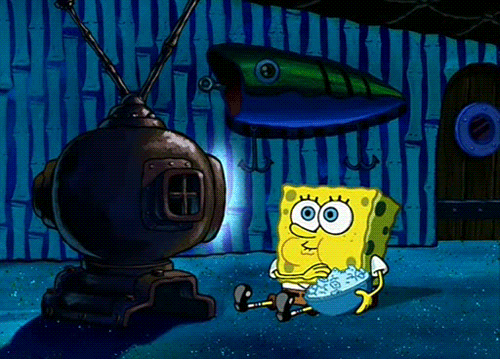